In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import autocorrelation_plot
from collections import Counter

In [4]:
ls data/

FEDFUNDS.csv
GDP.csv
^GSPC.csv
government_debt.csv
inflation.csv
personal_expenditure_no_food_energy.csv
unemployment_rate.csv


In [5]:
pd.to_datetime('2007-02-20')

Timestamp('2007-02-20 00:00:00')

/Users/nolandey/anaconda/envs/tensorflow3/lib/python3.6/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


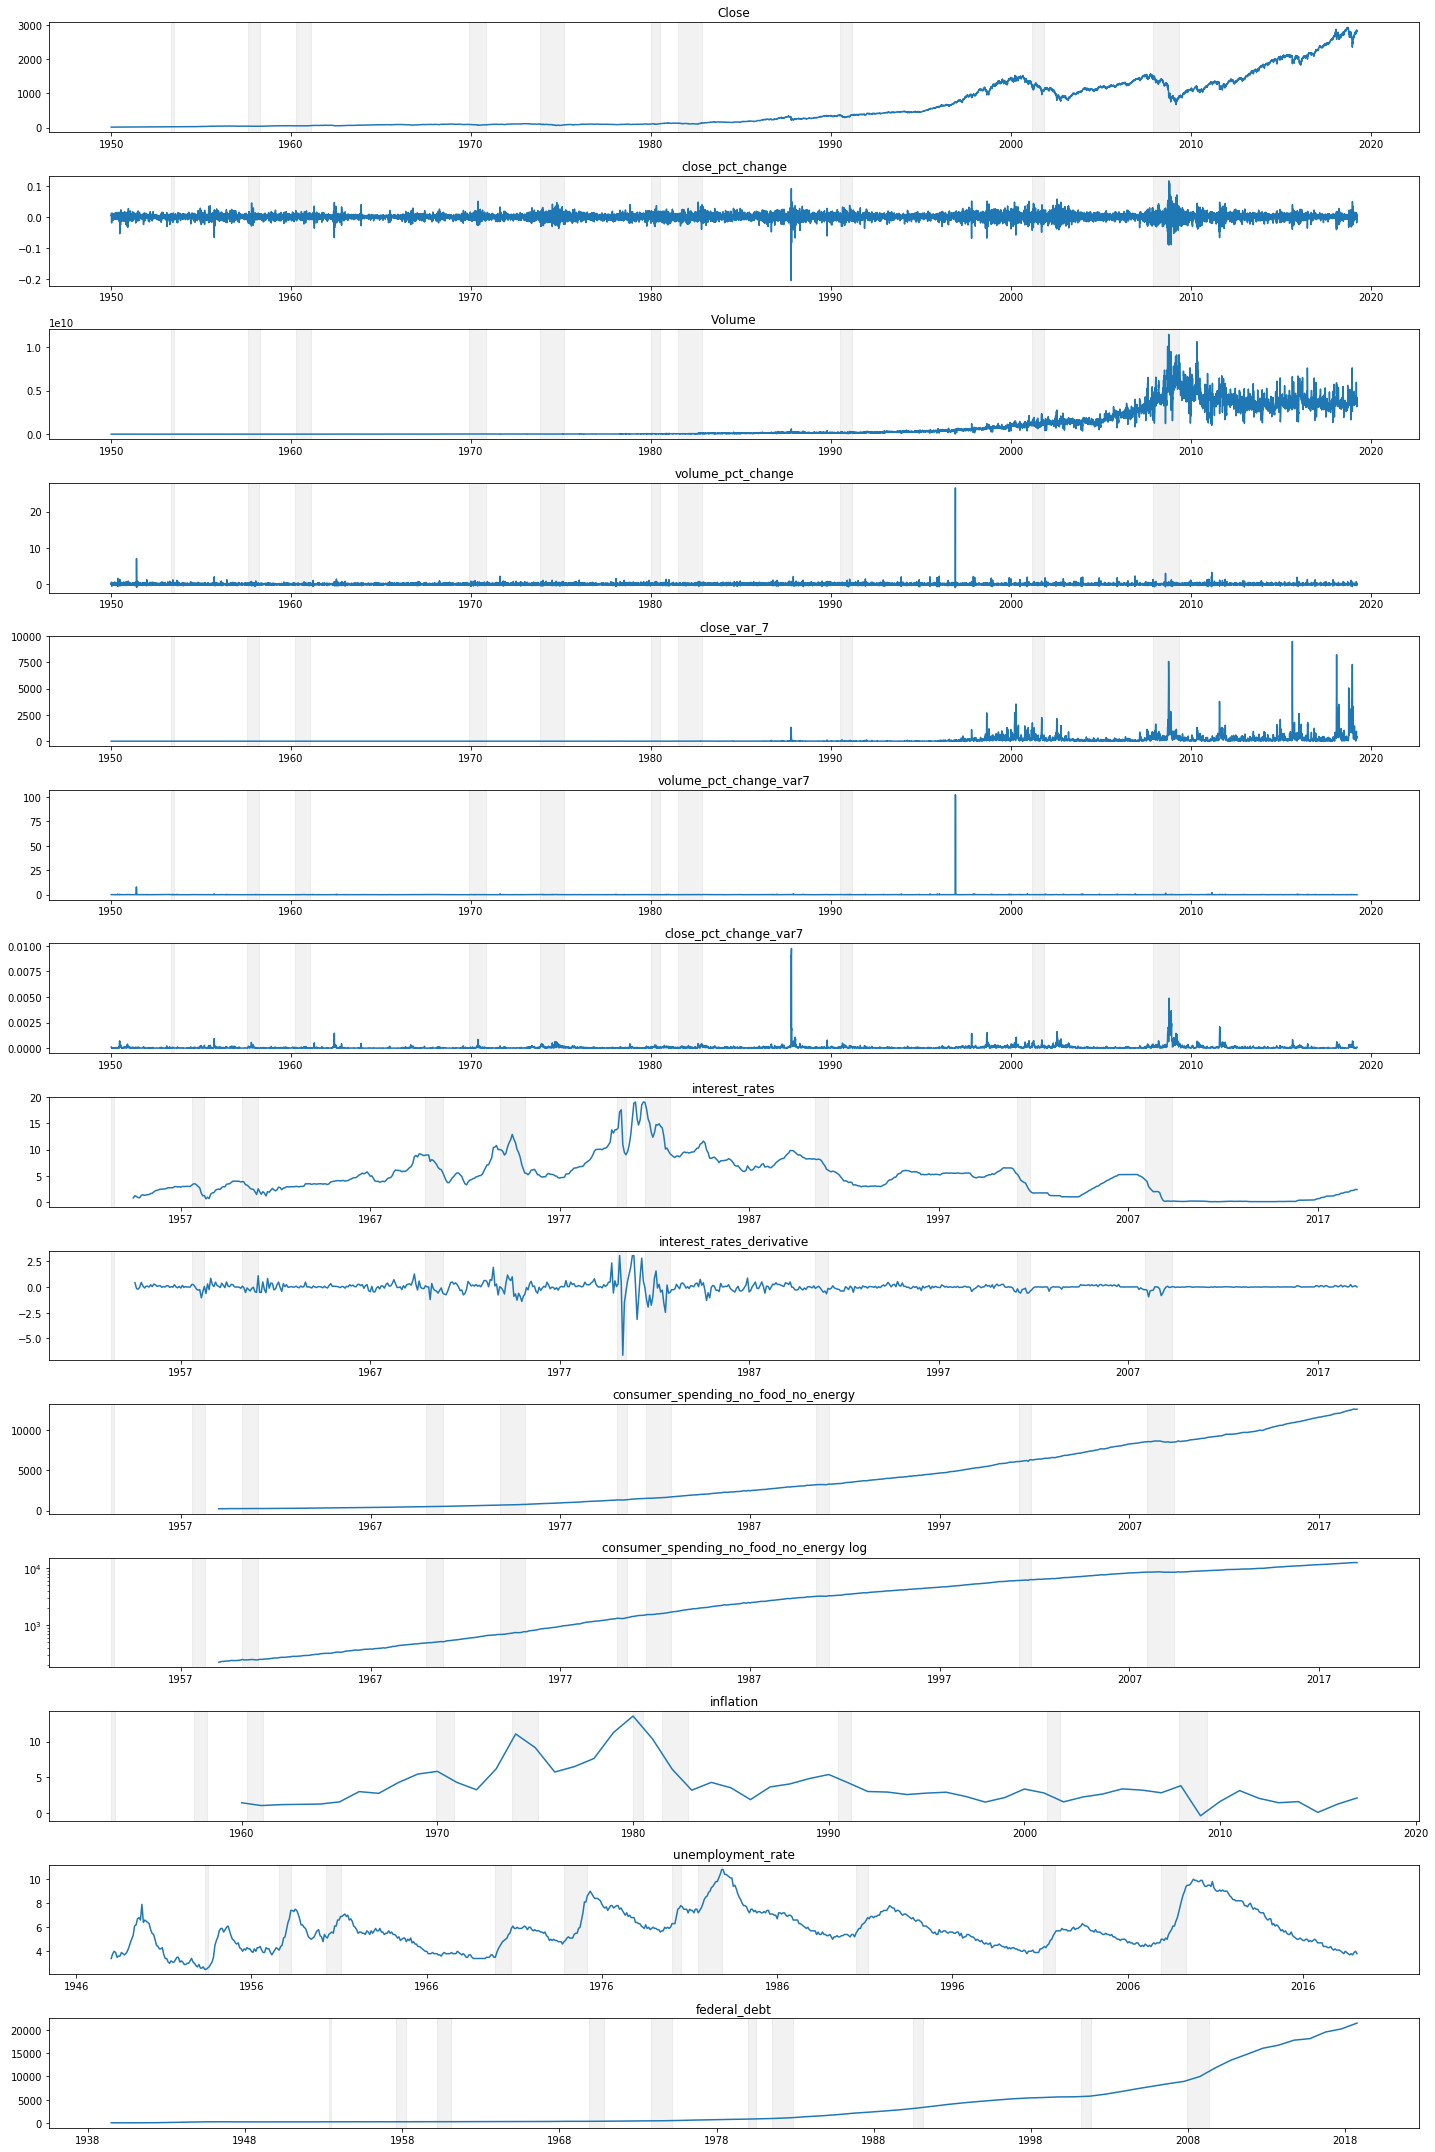

In [6]:
sandp_df = pd.read_csv('data/^GSPC.csv', sep=',')
sandp_df['Date'] = pd.to_datetime(sandp_df['Date'])
sandp_df = sandp_df.set_index('Date')
# sandp_df = sandp_df.loc['2005-1-1':]

# [(start, end)]
# https://www.thebalance.com/the-history-of-recessions-in-the-united-states-3306011
# https://en.wikipedia.org/wiki/List_of_economic_crises
recessions = [
    ('1953-07-01', '1953-05-01'), # Post Korean War 6.1% unemployment
    ('1957-08-01', '1958-04-01'), # 7.5% unemployment
    ('1960-04-01', '1961-02-01'), # Richard Nixon 7.1% unemployment
    ('1969-12-01', '1970-11-01'), # 6.1% unemployment (mild)
    ('1973-11-01', '1975-03-01'), # OPEC - 9% unemployment
    ('1980-01-01', '1980-07-01'), # 
    ('1981-07-01', '1982-11-01'), # 10% unemployment
    ('1990-07-01', '1991-03-01'), # 7.8% unemployment
    ('2001-03-01', '2001-11-01'), # Y2K 6.3% unemployment
    ('2007-12-01', '2009-05-01'), # 2008
]

def plot_recessions(ax):
#     ax.axvline(x=pd.to_datetime(f'20080915', format='%Y%m%d'), linestyle='dashed', color='grey')
    for r in recessions:
        ax.axvspan(
            pd.to_datetime(r[0]),
            pd.to_datetime(r[1]),
            alpha=0.1,
            color='gray')
    pass
        
fig, axes = plt.subplots(14,1,figsize=(20,30))
i=0

axes[i].plot(sandp_df['Close'])
axes[i].set_title('Close')
plot_recessions(axes[i])
i += 1

# axes[i].plot(sandp_df['Close'])
# axes[i].set_yscale('log')
# axes[i].set_title('Close Log')
# plot_recessions(axes[i])
# i += 1

axes[i].plot(sandp_df['Close'].pct_change())
axes[i].set_title('close_pct_change')
plot_recessions(axes[i])
i += 1

axes[i].plot(sandp_df['Volume'])
axes[i].set_title('Volume')
plot_recessions(axes[i])
i += 1

axes[i].plot(sandp_df['Volume'].pct_change())
axes[i].set_title('volume_pct_change')
plot_recessions(axes[i])
i += 1

axes[i].plot(sandp_df['Close'].rolling(window=7).var())
axes[i].set_title('close_var_7')
plot_recessions(axes[i])
i += 1

axes[i].plot(sandp_df['Volume'].pct_change().rolling(window=7).var())
axes[i].set_title('volume_pct_change_var7')
plot_recessions(axes[i])
i += 1

axes[i].plot(sandp_df['Close'].pct_change().rolling(window=7).var())
axes[i].set_title('close_pct_change_var7')
plot_recessions(axes[i])
i += 1

# interest rate
interest_df = pd.read_csv('data/FEDFUNDS.csv', sep=',')
interest_df['DATE'] = pd.to_datetime(interest_df['DATE'])
interest_df = interest_df.set_index('DATE')
interest_rates = interest_df['FEDFUNDS']

axes[i].plot(interest_rates)
axes[i].set_title('interest_rates')
plot_recessions(axes[i])
i += 1

# interest rate derivative
interest_rates_derivative = interest_rates.diff()

axes[i].plot(interest_rates_derivative)
axes[i].set_title('interest_rates_derivative')
plot_recessions(axes[i])
i += 1

# consumer spending
spending_df = pd.read_csv('data/personal_expenditure_no_food_energy.csv')
spending_df['DATE'] = pd.to_datetime(spending_df['DATE'])
spending_df = spending_df.set_index('DATE')
spending = spending_df['DPCCRC1M027SBEA']

axes[i].plot(spending)
axes[i].set_title('consumer_spending_no_food_no_energy')
plot_recessions(axes[i])
i += 1

axes[i].plot(spending)
axes[i].set_yscale('log')
axes[i].set_title('consumer_spending_no_food_no_energy log')
plot_recessions(axes[i])
i += 1

# inflation
df = pd.read_csv('data/inflation.csv')
df['DATE'] = pd.to_datetime(df['DATE'])
df = df.set_index('DATE')
inflation = df['FPCPITOTLZGUSA']

axes[i].plot(inflation)
axes[i].set_title('inflation')
plot_recessions(axes[i])
i += 1

# unemployment
df = pd.read_csv('data/unemployment_rate.csv')
df['DATE'] = pd.to_datetime(df['DATE'])
df = df.set_index('DATE')
unemployment = df['UNRATE']

axes[i].plot(unemployment)
axes[i].set_title('unemployment_rate')
plot_recessions(axes[i])
i += 1

# US government debt
df = pd.read_csv('data/government_debt.csv')
df['DATE'] = pd.to_datetime(df['DATE'])
df = df.set_index('DATE')
federal_debt = df['FYGFD']

axes[i].plot(federal_debt)
axes[i].set_title('federal_debt')
plot_recessions(axes[i])
i += 1

plt.tight_layout()
plt.show()

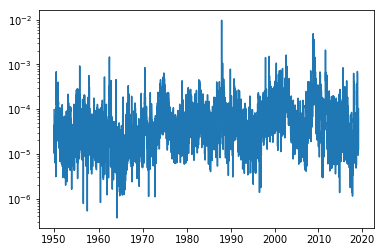

In [7]:
# val_freq_tuples = Counter(
#     sandp_df['Close'].pct_change().rolling(window=7).var()
# ).most_common()

# q_vals = []
# q_freqs = []
# for val, freq in val_freq_tuples:
#     q_vals.append(val)
#     q_freqs.append(freq)

plt.loglog(sandp_df['Close'].pct_change().rolling(window=7).var())

In [8]:

sandp_df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1950-01-03,16.66,16.66,16.66,16.66,16.66,1260000
1950-01-04,16.85,16.85,16.85,16.85,16.85,1890000
1950-01-05,16.93,16.93,16.93,16.93,16.93,2550000
1950-01-06,16.98,16.98,16.98,16.98,16.98,2010000
1950-01-09,17.08,17.08,17.08,17.08,17.08,2520000


In [9]:
sandp_df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-03-25,2796.010010,2809.790039,2785.020020,2798.360107,2798.360107,3376580000
2019-03-26,2812.659912,2829.870117,2803.989990,2818.459961,2818.459961,3266050000
2019-03-27,2819.719971,2825.560059,2787.719971,2805.370117,2805.370117,3372930000
2019-03-28,2809.399902,2819.709961,2798.770020,2815.439941,2815.439941,3158170000
2019-03-29,2828.270020,2836.030029,2819.229980,2834.399902,2834.399902,3740700000


In [10]:
sandp_df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,17422.000000,17422.000000,17422.000000,17422.000000,17422.000000,1.742200e+04
mean,576.186146,579.587836,572.585569,576.312075,576.312075,9.307335e+08
std,686.997628,690.501119,683.191893,687.094989,687.094989,1.554432e+09
min,16.660000,16.660000,16.660000,16.660000,16.660000,6.800000e+05
25%,86.002500,86.677498,85.292502,86.012501,86.012501,8.970000e+06
50%,166.944999,167.629997,166.070000,166.950005,166.950005,9.487500e+07
75%,1097.794983,1105.507508,1091.059998,1097.832519,1097.832519,1.214275e+09
max,2936.760010,2940.909912,2927.110107,2930.750000,2930.750000,1.145623e+10


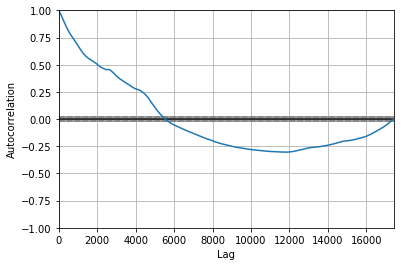

In [11]:
autocorrelation_plot(sandp_df['Close'])
pass

In [12]:
recession_rows = sandp_df.loc['1969-12-01':'1970-11-01']
start_row = recession_rows.head(1)
end_row = recession_rows.tail(1)
(end_row['Close'].values[0] - start_row['Close'].values[0]) / end_row['Close'].values[0]

-0.11975977177177173

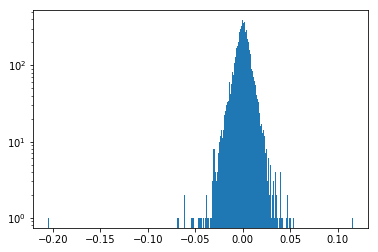

In [13]:
plt.hist(sandp_df['Close'].pct_change().dropna().to_list(), bins=1000)
plt.yscale('log')
pass

/Users/nolandey/anaconda/envs/tensorflow3/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in power
  """


(0.8, 200.0)

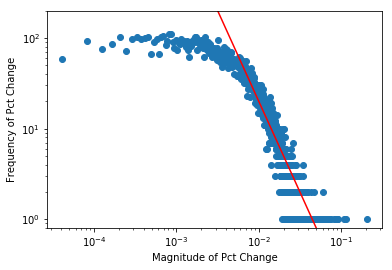

In [14]:
counts, bin_edges = np.histogram(sandp_df['Close'].pct_change().abs().dropna().to_list(), bins=5000)
plt.loglog(bin_edges[:-1], counts, linestyle='None', marker='o')
plt.ylabel('Frequency of Pct Change')
plt.xlabel('Magnitude of Pct Change')
plt.loglog(bin_edges[:-1], 0.002*np.power(bin_edges[:-1],-2), color='red')
plt.ylim(0.8, 2e2)
# plt.scatter(bin_edges[:-1], counts)
# plt.xscale('symlog')
# plt.yscale('symlog')

Text(0.5,0,'Magnitude of Pct Change')

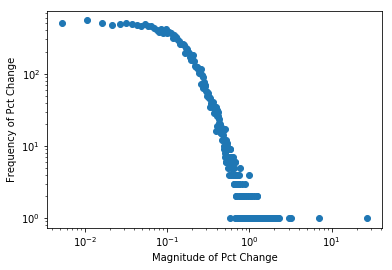

In [15]:
counts, bin_edges = np.histogram(sandp_df['Volume'].pct_change().abs().dropna().to_list(), bins=5000)
plt.loglog(bin_edges[:-1], counts, linestyle='None', marker='o')
plt.ylabel('Frequency of Pct Change')
plt.xlabel('Magnitude of Pct Change')
# plt.loglog(bin_edges[:-1], 0.002*np.power(bin_edges[:-1],-2), color='red')
# plt.ylim(0.8, 2e2)

Text(0.5,0,'Magnitude of Pct Change')

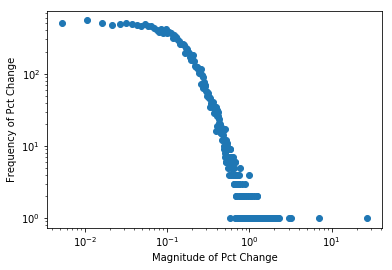

In [16]:
counts, bin_edges = np.histogram(sandp_df['Volume'].pct_change().abs().dropna().to_list(), bins=5000)
plt.loglog(bin_edges[:-1], counts, linestyle='None', marker='o')
plt.ylabel('Frequency of Pct Change')
plt.xlabel('Magnitude of Pct Change')
# plt.loglog(bin_edges[:-1], 0.002*np.power(bin_edges[:-1],-2), color='red')
# plt.ylim(0.8, 2e2)

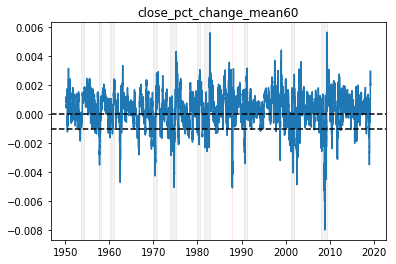

In [17]:
recessions = [
    ('1953-07-01', '1954-05-01'),  # Post Korean War 6.1% unemployment
    ('1957-08-01', '1958-04-01'),  # 7.5% unemployment
    ('1960-04-01', '1961-02-01'),  # Richard Nixon 7.1% unemployment
    ('1969-12-01', '1970-11-01'),  # 6.1% unemployment (mild)
    ('1973-11-01', '1975-03-01'),  # OPEC - 9% unemployment
    ('1980-01-01', '1980-07-01'),  #
    ('1981-07-01', '1982-11-01'),  # 10% unemployment
    ('1990-07-01', '1991-03-01'),  # 7.8% unemployment
    ('2001-03-01', '2001-11-01'),  # Y2K 6.3% unemployment
    ('2007-12-01', '2009-05-01'),  # 2008
]


def plot_recessions():
    # plt.axvline(x=pd.to_datetime(f'20080915', format='%Y%m%d'), linestyle='dashed', color='grey')
    plt.axvspan(
        pd.to_datetime('1987-10-18'),
        pd.to_datetime('1987-10-20'),
        alpha=0.1,
        color='red')
    for r in recessions:
        plt.axvspan(
            pd.to_datetime(r[0]), pd.to_datetime(r[1]), alpha=0.1, color='gray')
        
plt.plot(sandp_df['Close'].pct_change().rolling(window=60).mean())
plt.axhline(0, color='black', linestyle='dashed')
plt.axhline(-0.001, color='black', linestyle='dashed')
plt.title('close_pct_change_mean60')
plot_recessions()

In [18]:
recession_rows = sandp_df['Close'].pct_change().rolling(
    window=60).mean().loc['1969-12-01':'1970-11-01']
start_row = recession_rows.head(1)
end_row = recession_rows.tail(1)

end_row

Date
1970-10-30    0.001315
Name: Close, dtype: float64

In [23]:
for date, change in sandp_df['Close'].pct_change().rolling(
        window=60).mean().dropna().iteritems():
    print(type(date))
    print(date, change)

<class 'pandas._libs.tslibs.timestamps.Timestamp'>
1950-03-30 00:00:00 0.0006438758979265787
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
1950-03-31 00:00:00 0.0004441678823719079
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
1950-04-03 00:00:00 0.0005963858940816006
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
1950-04-04 00:00:00 0.0005661767255101443
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
1950-04-05 00:00:00 0.0005439954473515899
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
1950-04-06 00:00:00 0.0007345901217366761
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
1950-04-10 00:00:00 0.0007414870546285997
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
1950-04-11 00:00:00 0.0009699420020454412
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
1950-04-12 00:00:00 0.0012378455035637022
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
1950-04-13 00:00:00 0.0012250164769962509
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
1950-04-14 00:00:00

1953-05-11 00:00:00 -0.0004627175532738503
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
1953-05-12 00:00:00 -0.0006414636133792025
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
1953-05-13 00:00:00 -0.0006033994147107184
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
1953-05-14 00:00:00 -0.00041150414313216127
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
1953-05-15 00:00:00 -0.00040513915582268505
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
1953-05-18 00:00:00 -0.0005243953309794824
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
1953-05-19 00:00:00 -0.0005971723695176438
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
1953-05-20 00:00:00 -0.0005200115768058714
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
1953-05-21 00:00:00 -0.0005366621011867616
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
1953-05-22 00:00:00 -0.0005823436213601762
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
1953-05-25 00:00:00 -0.0005768653122676844
<class 'pandas.

1956-01-11 00:00:00 0.001193260561373455
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
1956-01-12 00:00:00 0.0014006653967830278
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
1956-01-13 00:00:00 0.001318307227384774
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
1956-01-16 00:00:00 0.0009996405524222503
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
1956-01-17 00:00:00 0.0009561784261272447
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
1956-01-18 00:00:00 0.0006377360913843758
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
1956-01-19 00:00:00 0.00046793870991290916
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
1956-01-20 00:00:00 0.00015210680823091738
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
1956-01-23 00:00:00 0.0002184425454744306
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
1956-01-24 00:00:00 0.0005601379252568206
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
1956-01-25 00:00:00 0.000567160485406204
<class 'pandas._libs.tslibs.t

<class 'pandas._libs.tslibs.timestamps.Timestamp'>
1958-09-03 00:00:00 0.0013131995095941836
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
1958-09-04 00:00:00 0.0013191797423047732
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
1958-09-05 00:00:00 0.0012703879830892753
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
1958-09-08 00:00:00 0.0012285788702026345
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
1958-09-09 00:00:00 0.0012422933577205437
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
1958-09-10 00:00:00 0.0011314721716660795
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
1958-09-11 00:00:00 0.001333854662688231
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
1958-09-12 00:00:00 0.001147816459044095
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
1958-09-15 00:00:00 0.0015638339629224526
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
1958-09-16 00:00:00 0.0016069301917918184
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
1958-09-17 00:00:00 0

1961-04-26 00:00:00 0.0009736742201614801
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
1961-04-27 00:00:00 0.0010018904406700984
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
1961-04-28 00:00:00 0.0009313251775662242
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
1961-05-01 00:00:00 0.0007878983499797857
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
1961-05-02 00:00:00 0.0009294983491846043
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
1961-05-03 00:00:00 0.0011898296105525305
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
1961-05-04 00:00:00 0.0012849918264470498
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
1961-05-05 00:00:00 0.0011536673513279916
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
1961-05-08 00:00:00 0.0011770110593767257
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
1961-05-09 00:00:00 0.0013318081476274576
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
1961-05-10 00:00:00 0.0014143257657615687
<class 'pandas._libs.tslibs.

1964-02-14 00:00:00 0.001289364618726076
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
1964-02-17 00:00:00 0.001268819520402085
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
1964-02-18 00:00:00 0.0011179822661354219
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
1964-02-19 00:00:00 0.0013511057842286436
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
1964-02-20 00:00:00 0.0018338967266124254
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
1964-02-24 00:00:00 0.0011835614405255066
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
1964-02-25 00:00:00 0.001213495355370331
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
1964-02-26 00:00:00 0.0010281939434618932
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
1964-02-27 00:00:00 0.0008768205648942262
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
1964-02-28 00:00:00 0.0009245212145049698
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
1964-03-02 00:00:00 0.000920189156299415
<class 'pandas._libs.tslibs.time

<class 'pandas._libs.tslibs.timestamps.Timestamp'>
1966-09-23 00:00:00 -0.0014297283026162158
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
1966-09-26 00:00:00 -0.0013653880564933644
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
1966-09-27 00:00:00 -0.0014851266675063256
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
1966-09-28 00:00:00 -0.0017372765175937685
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
1966-09-29 00:00:00 -0.002151004036779791
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
1966-09-30 00:00:00 -0.002157662435376532
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
1966-10-03 00:00:00 -0.0025629043705812705
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
1966-10-04 00:00:00 -0.0024879627927676413
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
1966-10-05 00:00:00 -0.0024703181902881307
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
1966-10-06 00:00:00 -0.0025018670449402777
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
1966-10-07 

<class 'pandas._libs.tslibs.timestamps.Timestamp'>
1969-05-16 00:00:00 0.0007433789908681247
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
1969-05-19 00:00:00 0.0007140508939129061
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
1969-05-20 00:00:00 0.0007087975049276885
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
1969-05-21 00:00:00 0.0009764324758054666
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
1969-05-22 00:00:00 0.0011019713011333236
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
1969-05-23 00:00:00 0.0010204303451521902
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
1969-05-26 00:00:00 0.0010362598617440785
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
1969-05-27 00:00:00 0.0009117924609042742
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
1969-05-28 00:00:00 0.000819446354490172
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
1969-05-29 00:00:00 0.0006924798708475992
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
1969-06-02 00:00:00 

<class 'pandas._libs.tslibs.timestamps.Timestamp'>
1972-08-30 00:00:00 0.0003714952169770025
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
1972-08-31 00:00:00 0.0005361279125295567
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
1972-09-01 00:00:00 0.0006564256599994119
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
1972-09-05 00:00:00 0.0006798255543163342
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
1972-09-06 00:00:00 0.0005545393282732976
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
1972-09-07 00:00:00 0.00043123663467308225
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
1972-09-08 00:00:00 0.00027990905106973775
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
1972-09-11 00:00:00 0.00017538265969792392
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
1972-09-12 00:00:00 2.9397423035317412e-05
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
1972-09-13 00:00:00 0.00013392014474182998
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
1972-09-14 00:

1975-12-19 00:00:00 0.0006407135073691154
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
1975-12-22 00:00:00 0.0004098010918137903
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
1975-12-23 00:00:00 0.0007456779904849016
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
1975-12-24 00:00:00 0.0011101672872240009
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
1975-12-26 00:00:00 0.001444144464327914
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
1975-12-29 00:00:00 0.001243117535454774
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
1975-12-30 00:00:00 0.0007530210158619396
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
1975-12-31 00:00:00 0.0006506615874707319
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
1976-01-02 00:00:00 0.0008029679825137674
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
1976-01-05 00:00:00 0.0008862657604056042
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
1976-01-06 00:00:00 0.0009757933294471221
<class 'pandas._libs.tslibs.ti

1979-02-15 00:00:00 0.0006273303838092992
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
1979-02-16 00:00:00 0.0006591953071168796
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
1979-02-20 00:00:00 0.0007034325836230593
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
1979-02-21 00:00:00 0.0005906470739736731
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
1979-02-22 00:00:00 0.0004313584886070717
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
1979-02-23 00:00:00 0.0004839823173198754
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
1979-02-26 00:00:00 0.0007104597527958482
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
1979-02-27 00:00:00 0.0002787815553347654
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
1979-02-28 00:00:00 2.671688997603801e-05
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
1979-03-01 00:00:00 0.00015654655480601038
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
1979-03-02 00:00:00 -5.5022653466866674e-05
<class 'pandas._libs.tsli

<class 'pandas._libs.tslibs.timestamps.Timestamp'>
1981-11-27 00:00:00 0.000266286528179079
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
1981-11-30 00:00:00 0.0007378342451925461
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
1981-12-01 00:00:00 0.0008656947998537445
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
1981-12-02 00:00:00 0.0009694434252259021
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
1981-12-03 00:00:00 0.0009675874840592291
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
1981-12-04 00:00:00 0.0008745095611638499
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
1981-12-07 00:00:00 0.0005293375966046603
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
1981-12-08 00:00:00 0.0006102760847269258
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
1981-12-09 00:00:00 0.0008213393196553065
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
1981-12-10 00:00:00 0.0009771273563869568
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
1981-12-11 00:00:00 

<class 'pandas._libs.tslibs.timestamps.Timestamp'>
1985-03-14 00:00:00 0.0014207738312154512
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
1985-03-15 00:00:00 0.0008395973939185638
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
1985-03-18 00:00:00 0.0009668264566072504
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
1985-03-19 00:00:00 0.0012952357543495588
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
1985-03-20 00:00:00 0.0013396857658729776
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
1985-03-21 00:00:00 0.001238941005758265
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
1985-03-22 00:00:00 0.0012391152373265528
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
1985-03-25 00:00:00 0.0012115958358478785
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
1985-03-26 00:00:00 0.0012033919593558485
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
1985-03-27 00:00:00 0.0012088333693791586
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
1985-03-28 00:00:00 

1988-06-30 00:00:00 0.0005576473688432523
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
1988-07-01 00:00:00 0.000410771697357748
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
1988-07-05 00:00:00 0.00045314444118502715
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
1988-07-06 00:00:00 0.000178963759439806
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
1988-07-07 00:00:00 8.961300406670388e-05
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
1988-07-08 00:00:00 -3.121507239562023e-05
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
1988-07-11 00:00:00 0.000727496208358012
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
1988-07-12 00:00:00 0.0005598868797552558
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
1988-07-13 00:00:00 0.0006872851384134867
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
1988-07-14 00:00:00 0.0008283994383249875
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
1988-07-15 00:00:00 0.0010544550579815496
<class 'pandas._libs.tslibs.t

1991-10-16 00:00:00 0.0006061539603318677
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
1991-10-17 00:00:00 0.0006030789887001971
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
1991-10-18 00:00:00 0.0005256245255079136
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
1991-10-21 00:00:00 0.00042162858907357124
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
1991-10-22 00:00:00 0.00023091280464014504
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
1991-10-23 00:00:00 8.165356680859271e-05
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
1991-10-24 00:00:00 -8.991984822297091e-05
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
1991-10-25 00:00:00 -9.792129685721e-05
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
1991-10-28 00:00:00 0.00013027718443847275
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
1991-10-29 00:00:00 0.000305399972698106
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
1991-10-30 00:00:00 0.00012775286516971684
<class 'pandas._libs.tslib

1995-02-01 00:00:00 0.00030349533804439427
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
1995-02-02 00:00:00 0.0003596932706444123
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
1995-02-03 00:00:00 0.0004734098292927665
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
1995-02-06 00:00:00 0.0005690608103700423
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
1995-02-07 00:00:00 0.0005945148352158258
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
1995-02-08 00:00:00 0.0006801864552716659
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
1995-02-09 00:00:00 0.0005125338827339824
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
1995-02-10 00:00:00 0.0005927335641417434
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
1995-02-13 00:00:00 0.0005781654387784496
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
1995-02-14 00:00:00 0.0006826866129462058
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
1995-02-15 00:00:00 0.0008269206406618305
<class 'pandas._libs.tslibs

1998-05-20 00:00:00 0.0014027966433490266
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
1998-05-21 00:00:00 0.0011373996375723542
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
1998-05-22 00:00:00 0.0009828358704723169
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
1998-05-26 00:00:00 0.0007252969739944456
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
1998-05-27 00:00:00 0.0007240752645282918
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
1998-05-28 00:00:00 0.000737294589760353
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
1998-05-29 00:00:00 0.0007086447519422612
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
1998-06-01 00:00:00 0.000906505997739776
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
1998-06-02 00:00:00 0.0006083765194284237
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
1998-06-03 00:00:00 0.000501811302735065
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
1998-06-04 00:00:00 0.0004989616866662938
<class 'pandas._libs.tslibs.tim

<class 'pandas._libs.tslibs.timestamps.Timestamp'>
2001-09-10 00:00:00 -0.001782330514367105
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
2001-09-17 00:00:00 -0.002527309214856299
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
2001-09-18 00:00:00 -0.0025426725021748513
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
2001-09-19 00:00:00 -0.0028684494683552165
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
2001-09-20 00:00:00 -0.003531260910676883
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
2001-09-21 00:00:00 -0.004037902133312601
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
2001-09-24 00:00:00 -0.003230680805470894
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
2001-09-25 00:00:00 -0.002992375575776192
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
2001-09-26 00:00:00 -0.003053321335446624
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
2001-09-27 00:00:00 -0.002783895835844545
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
2001-09-28 00:00:

<class 'pandas._libs.tslibs.timestamps.Timestamp'>
2005-01-05 00:00:00 0.0008787918227183944
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
2005-01-06 00:00:00 0.00097502179770243
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
2005-01-07 00:00:00 0.001072843191256075
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
2005-01-10 00:00:00 0.0012849349019868784
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
2005-01-11 00:00:00 0.0011091046812760148
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
2005-01-12 00:00:00 0.00108793104508302
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
2005-01-13 00:00:00 0.0011055235935858573
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
2005-01-14 00:00:00 0.0011991027027399312
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
2005-01-18 00:00:00 0.0013176129611290166
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
2005-01-19 00:00:00 0.0013213679937064625
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
2005-01-20 00:00:00 0.00

2008-04-29 00:00:00 4.8380696141273974e-05
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
2008-04-30 00:00:00 0.00015865682423639357
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
2008-05-01 00:00:00 0.0009775925787075424
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
2008-05-02 00:00:00 0.0011585799051273733
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
2008-05-05 00:00:00 0.0009515906306308479
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
2008-05-06 00:00:00 0.0011491848523486447
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
2008-05-07 00:00:00 0.0007491383652062793
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
2008-05-08 00:00:00 0.0006891992924388856
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
2008-05-09 00:00:00 0.00035037410607294446
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
2008-05-12 00:00:00 0.0007577450219797887
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
2008-05-13 00:00:00 0.0007373713630741981
<class 'pandas._libs.tsli

2011-08-17 00:00:00 -0.0014831006948361203
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
2011-08-18 00:00:00 -0.0022125396052901686
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
2011-08-19 00:00:00 -0.00251574211478231
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
2011-08-22 00:00:00 -0.0025773266830883823
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
2011-08-23 00:00:00 -0.002073927384374635
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
2011-08-24 00:00:00 -0.0020318065762634564
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
2011-08-25 00:00:00 -0.0019114878431406876
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
2011-08-26 00:00:00 -0.0016390470811394739
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
2011-08-29 00:00:00 -0.001005483570045727
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
2011-08-30 00:00:00 -0.0007870297162095789
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
2011-08-31 00:00:00 -0.0006890565485158651
<class 'pandas._libs.

2014-12-09 00:00:00 0.0006560036974722646
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
2014-12-10 00:00:00 0.0002587479561087606
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
2014-12-11 00:00:00 0.00031274870976415273
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
2014-12-12 00:00:00 -3.89974134378394e-05
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
2014-12-15 00:00:00 -0.00013675269533869512
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
2014-12-16 00:00:00 -0.00014468102766809025
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
2014-12-17 00:00:00 0.0002908009278460392
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
2014-12-18 00:00:00 0.0005605128110705422
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
2014-12-19 00:00:00 0.0009061598370078565
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
2014-12-22 00:00:00 0.0008267371553121683
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
2014-12-23 00:00:00 0.0008982898919359587
<class 'pandas._libs.ts

2018-04-03 00:00:00 -0.000600707801962865
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
2018-04-04 00:00:00 -0.0005251625478441879
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
2018-04-05 00:00:00 -0.0004384872182837544
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
2018-04-06 00:00:00 -0.0008255402226020465
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
2018-04-09 00:00:00 -0.0007513939606704693
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
2018-04-10 00:00:00 -0.0005898388447421521
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
2018-04-11 00:00:00 -0.0007944216334265138
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
2018-04-12 00:00:00 -0.0005981676730216323
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
2018-04-13 00:00:00 -0.0008031956229821761
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
2018-04-16 00:00:00 -0.0006411051505914052
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
2018-04-17 00:00:00 -0.0005365006583055665
<class 'pandas._li